In [8]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
# matplotlib.rcParams['figure.figsize'] = (15,8)
pd.set_option('display.max_columns', None)

# Data loading

In [10]:
company = pd.read_csv('~/Documents/Internship/Startup-Acquisition-Status-Prediction/data/Final_dataset.csv')

In [4]:
company.sample(5)

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,activeDays,advertising,biotech,consulting,ecommerce,education,enterprise,games_video,hardware,mobile,network_hosting,other,public_relations,search,software,web,AUS,CAN,DEU,ESP,FRA,GBR,IND,ISR,USA,other.1
15239,NaN,NaN,1.0,4.0,43.653226,-79.383184,0,78,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2806,NaN,NaN,NaN,1.0,40.712775,-74.005973,0,792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5840,NaN,NaN,1.0,5.0,31.200092,29.918739,0,580,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27571,NaN,NaN,NaN,NaN,6.244203,-75.581212,0,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5758,2.0,2304999.0,2.0,3.0,37.774929,-122.419415,1,731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
company.columns

Index(['funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'lat', 'lng', 'isClosed', 'activeDays', 'advertising', 'biotech',
       'consulting', 'ecommerce', 'education', 'enterprise', 'games_video',
       'hardware', 'mobile', 'network_hosting', 'other', 'public_relations',
       'search', 'software', 'web', 'AUS', 'CAN', 'DEU', 'ESP', 'FRA', 'GBR',
       'IND', 'ISR', 'USA', 'other.1'],
      dtype='object')

# Exploratory Data Analysis

In [5]:
# Checking min, max, count, mean, std & quartile of the dataset
company.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,activeDays,advertising,biotech,consulting,ecommerce,education,enterprise,games_video,hardware,mobile,network_hosting,other,public_relations,search,software,web,acquired,closed,ipo,operating,AUS,CAN,DEU,ESP,FRA,GBR,IND,ISR,USA,other.1
count,17297.000000,1.503900e+04,29348.000000,41464.000000,54314.000000,54314.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000
mean,1.375788,3.913330e+06,1.286425,2.623264,37.115273,-47.231158,0.077960,2512.455532,0.057865,0.033563,0.047614,0.082980,0.019495,0.038901,0.046677,0.024090,0.061400,0.020891,0.214033,0.026264,0.016614,0.180665,0.128950,0.051926,0.026034,0.003853,0.918187,0.017798,0.044486,0.023471,0.015217,0.021174,0.084765,0.052033,0.012672,0.550230,0.178155
std,0.626069,5.714957e+06,0.576168,1.736049,16.375178,71.549386,0.268112,3443.753009,0.233490,0.180103,0.212950,0.275854,0.138256,0.193360,0.210949,0.153329,0.240064,0.143020,0.410154,0.159920,0.127820,0.384743,0.335148,0.221881,0.159238,0.061953,0.274083,0.132217,0.206173,0.151396,0.122418,0.143964,0.278534,0.222095,0.111857,0.497475,0.382646
min,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.485278,0.000000,-14722.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000e+05,1.000000,1.000000,33.916475,-104.990251,0.000000,699.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.339051e+06,1.000000,2.000000,39.904200,-74.511172,0.000000,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,5.000000e+06,1.000000,3.000000,45.501689,2.352222,0.000000,3167.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,2.922000e+07,7.000000,8.000000,77.553604,176.165130,1.000000,40908.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Counting the number of datatypes
floating_value = sum(company.dtypes == 'float64')
print(f'There are {floating_value} floating data types on the dataset')
int_value = sum(company.dtypes == 'int64')
print(f'There are {int_value} int data types on the dataset')

There are 31 floating data types on the dataset
There are 2 int data types on the dataset


## Ploting & Exploring features 

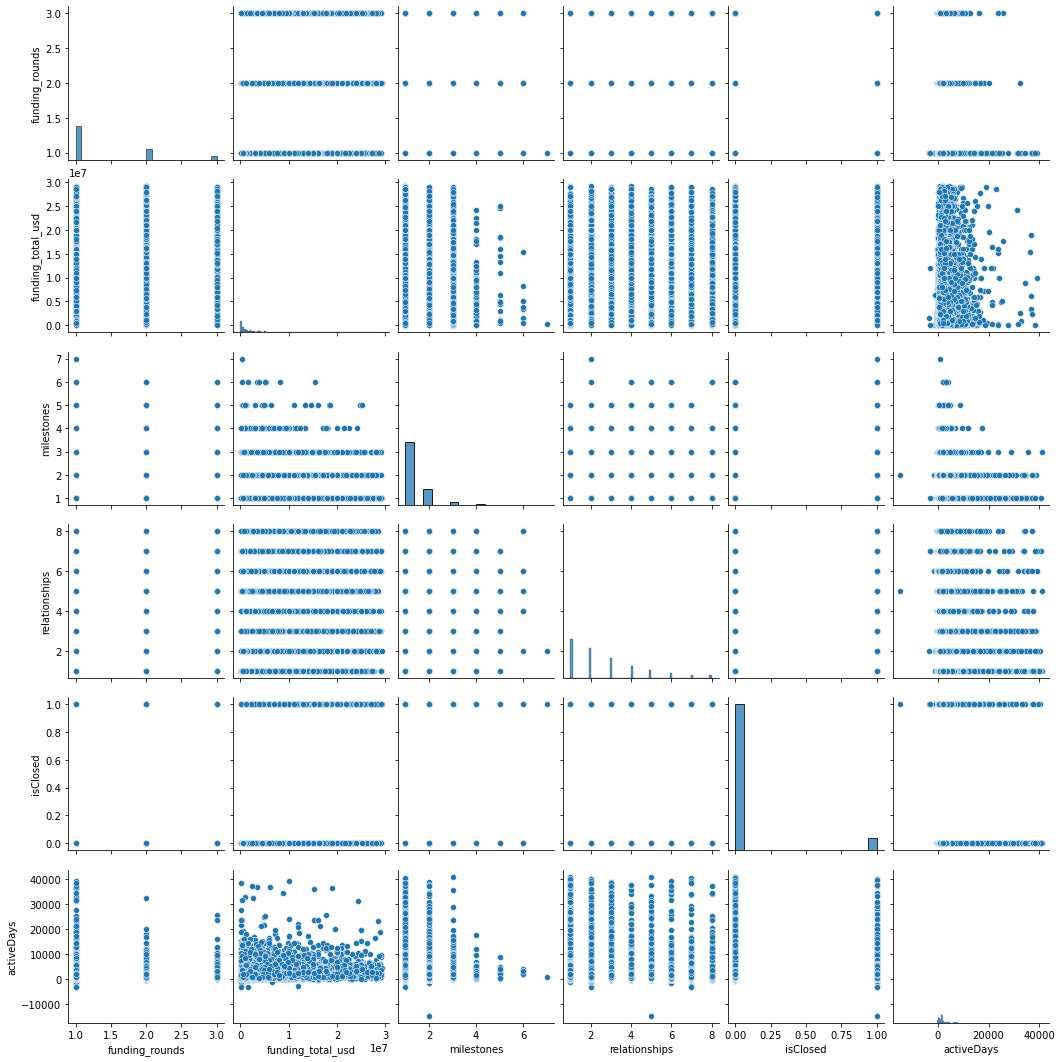

In [7]:
# Checking weather there is relationship between some important features or not 
num_column = ['funding_rounds', 'funding_total_usd', 'milestones', 'relationships','isClosed', 'activeDays']
# sns.set_palette('dark')
sns.pairplot(company[num_column])
plt.show()

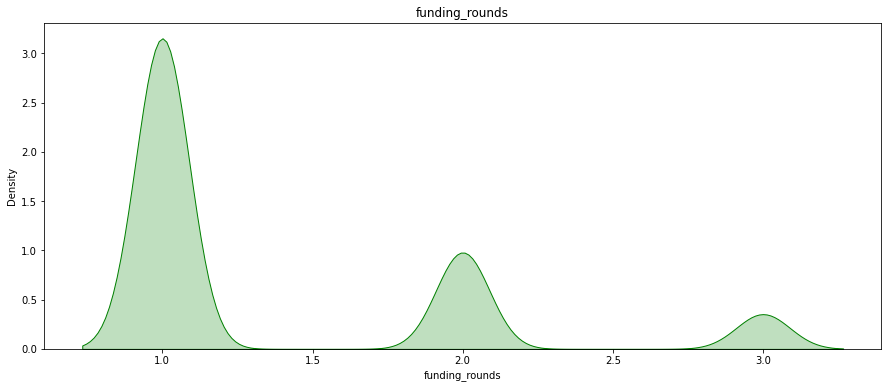

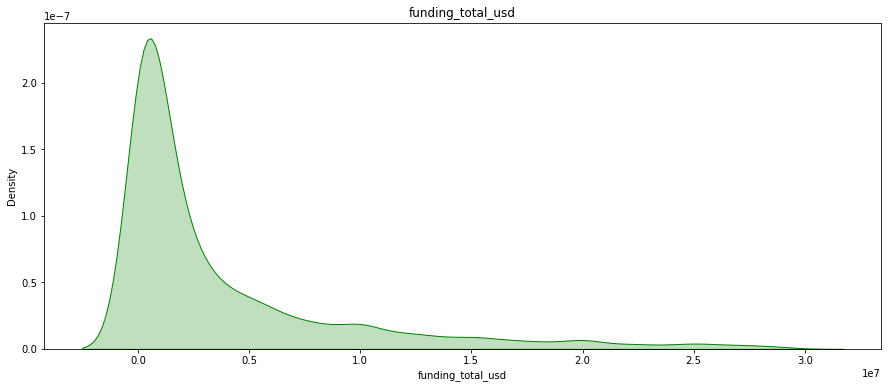

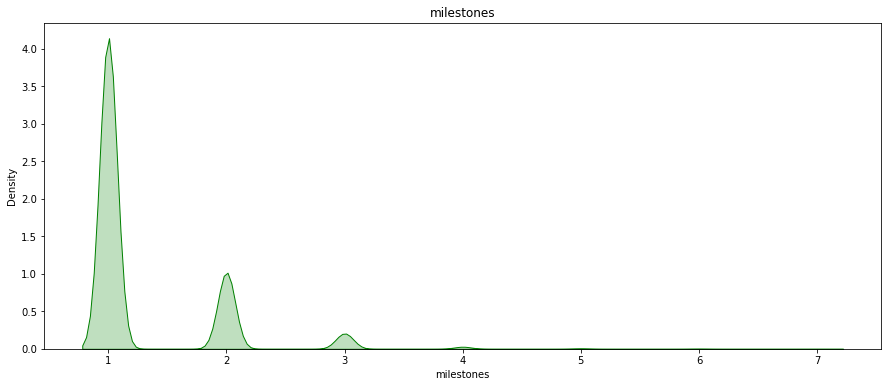

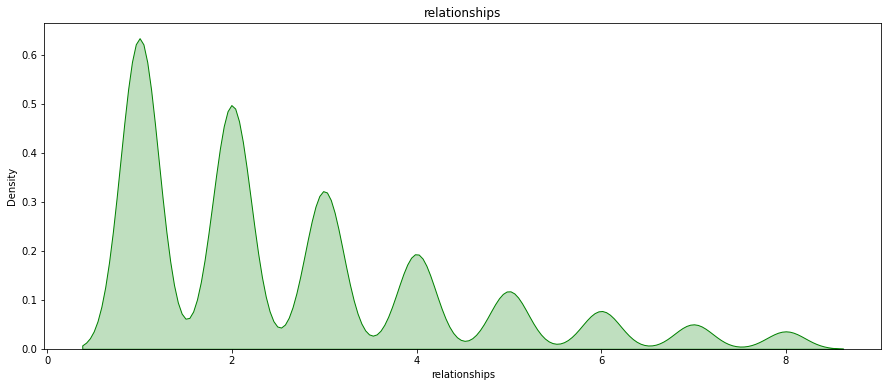

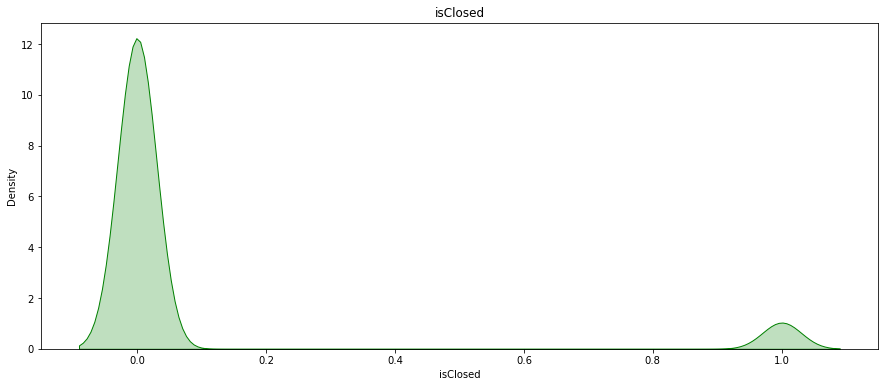

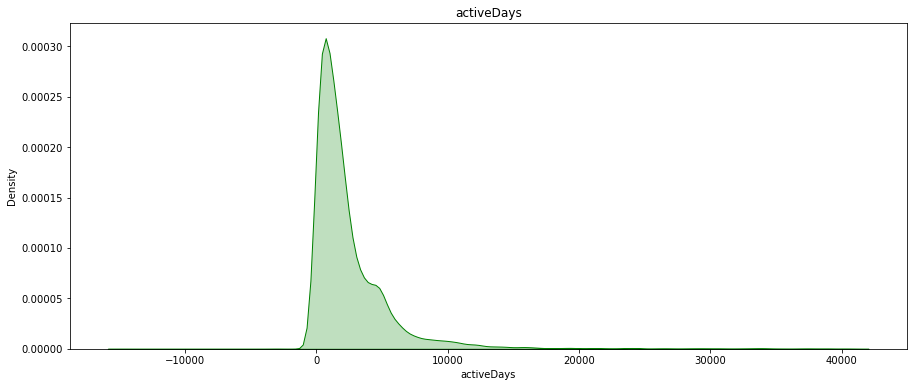

In [8]:
# Plot showing distribution of data 
for i in num_column:
    plt.figure(figsize=(15,6))
    sns.kdeplot(company[i],color='green',shade=True,thresh=True)
    plt.title(i)
    plt.show()

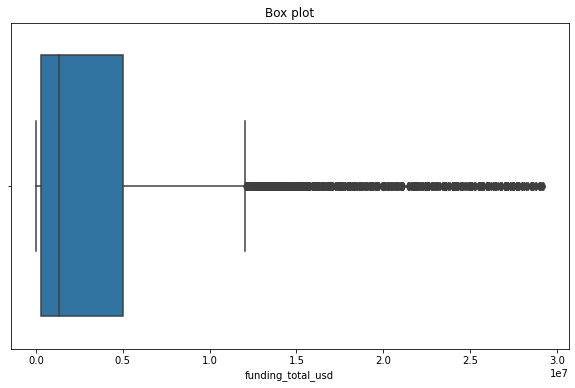

In [9]:
# Boxplot of funding total usd
plt.figure(figsize=(10,6))
sns.boxplot(x='funding_total_usd',data=company)
plt.title('Box plot')
plt.show()

Above diagram shows that large no of data are in the range of 0 to 0.5 

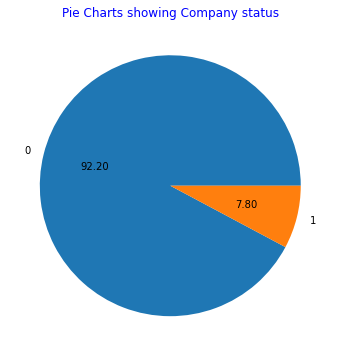

In [10]:
# Plotting pie chvalues of isClose column
plt.figure(figsize=(8,6))
plt.pie(company.isClosed.value_counts(),autopct='%.2f',labels=company.isClosed.value_counts().index)
plt.title('Pie Charts showing Company status',color='blue')
plt.show()

From the charts above we can analyse that few number arround 8% of company are only closed this shows that data is extremly biased

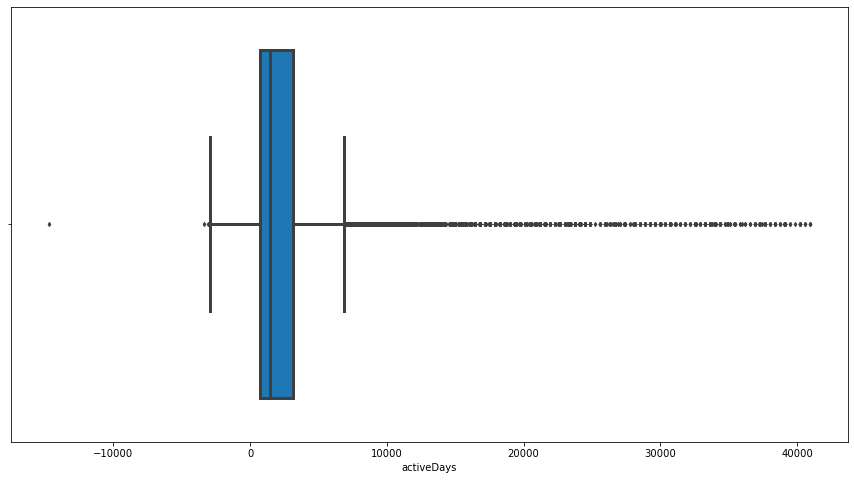

In [11]:
# Boxplot of activeDays 
plt.figure(figsize=(15,8))
sns.boxplot(x='activeDays',data=company,linewidth=3,fliersize=3,saturation=1)
plt.show()

isActive coluns data are slightly positively skewed

# Data filling & checking for correlated columns

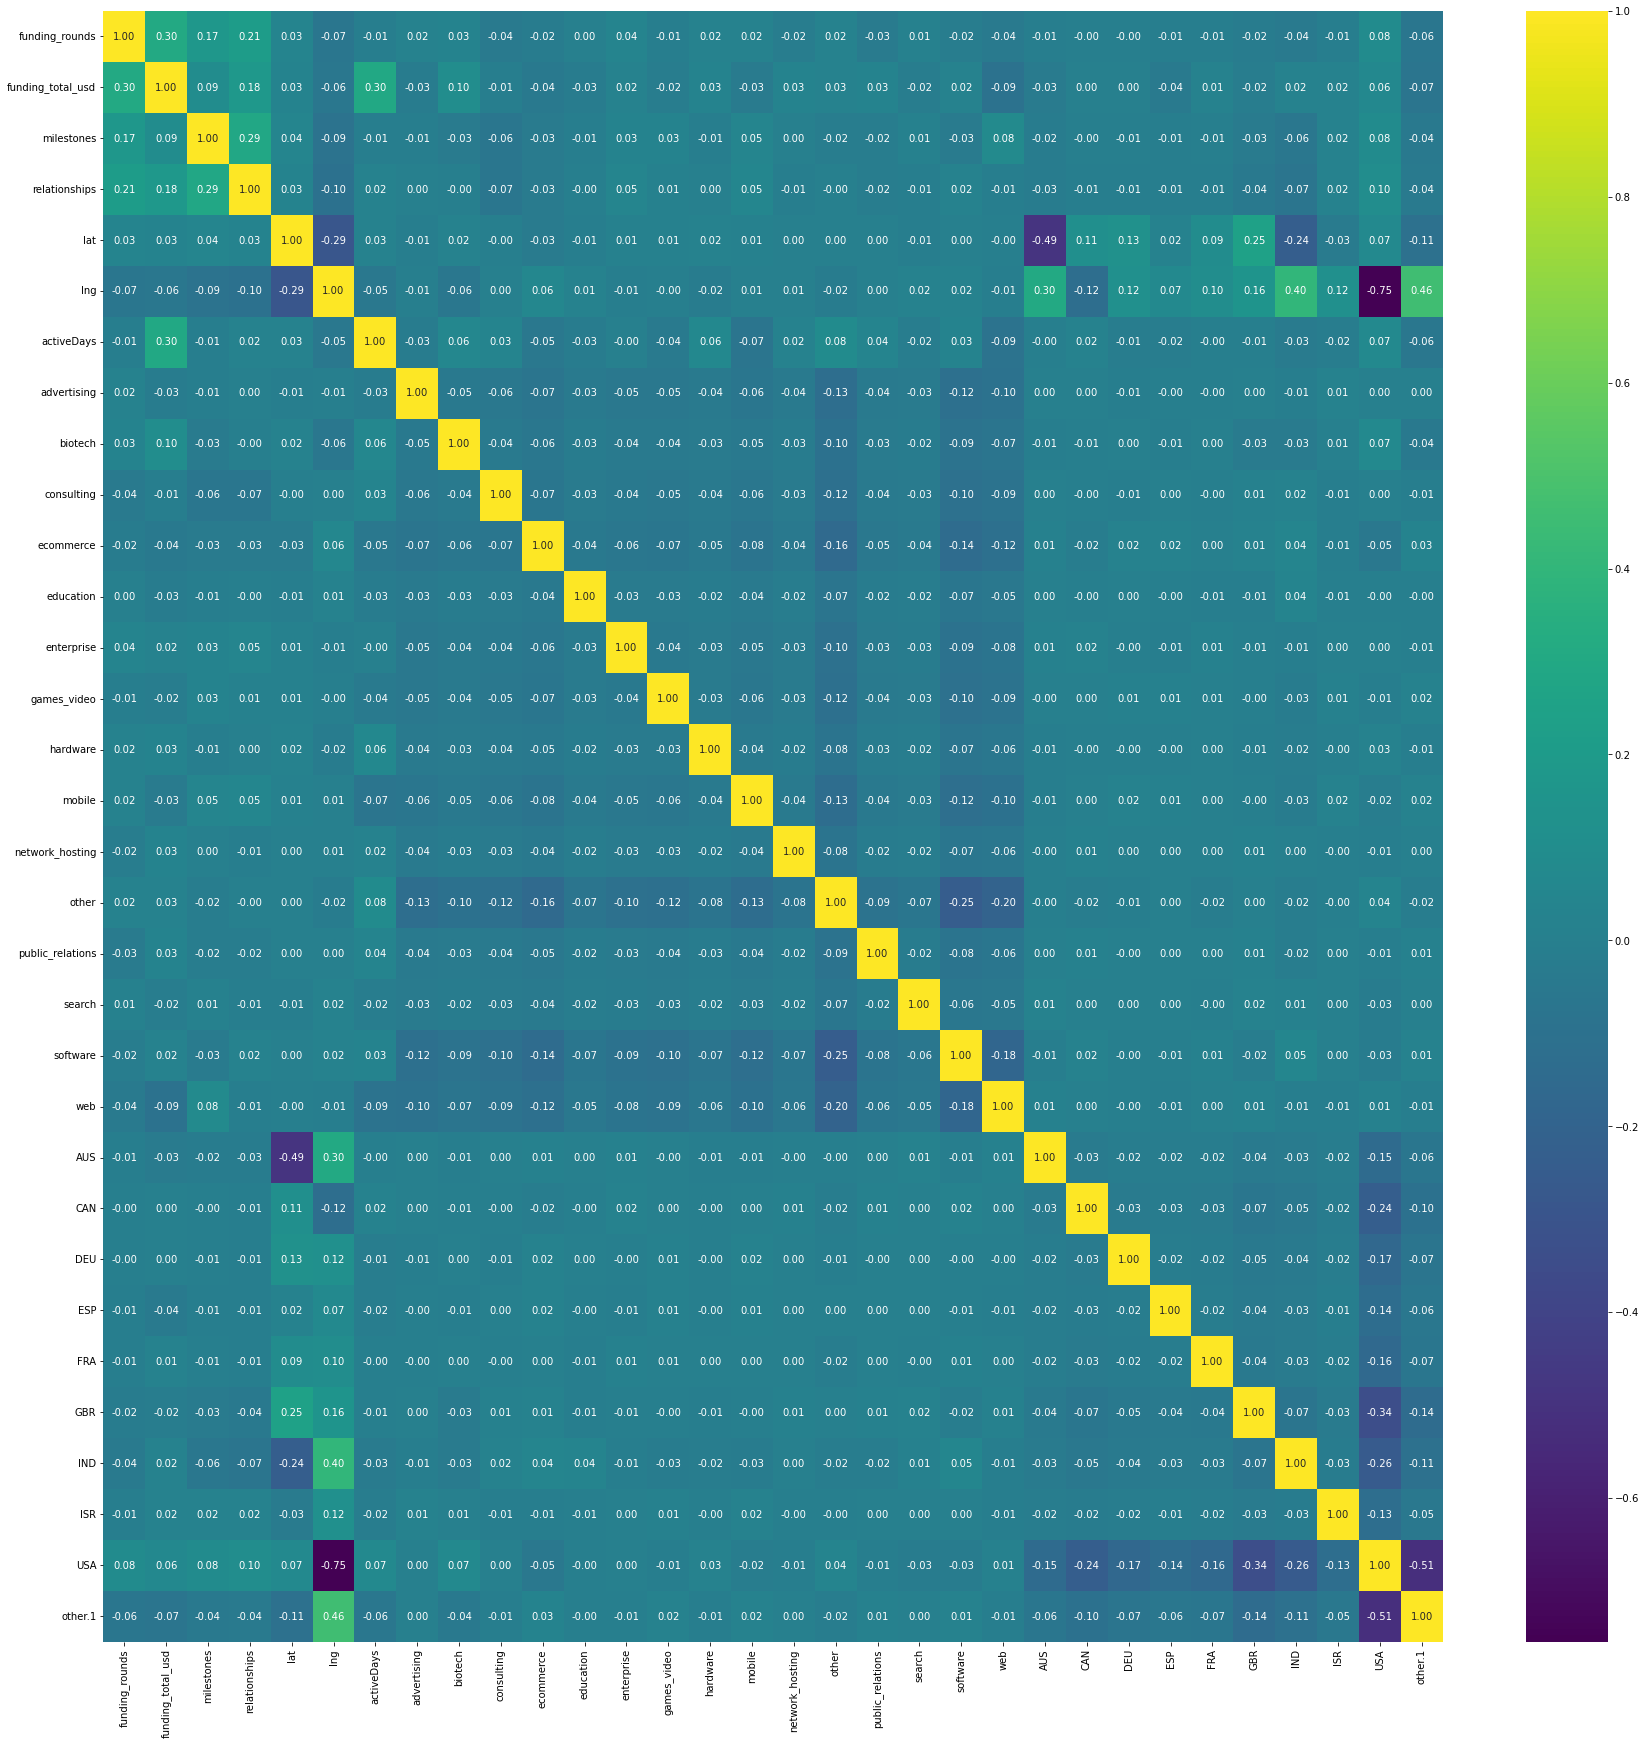

In [12]:
# Calculating coefficient of correlations
x_col = company.columns.tolist()
x_col.remove('isClosed')
input_data = company[x_col]
corr_coef = input_data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_coef,fmt='.2f',annot=True,cmap=plt.cm.viridis)
plt.show()

In [13]:
# Function that check correlation coefficient with given threshold and return the set of corelated columns
def corr_columns(data,threshold):
    temp = set()
    coef_corr = data.corr()
    for i in range(len(data.columns)):
        for j in range(i):
            if abs(coef_corr.iloc[i,j]) > threshold:
                temp.add(coef_corr.columns[i])
    return temp

# Checking the correlated columns and droping them
correlated_col = corr_columns(input_data,0.7)
correlated_col

{'USA'}

In [14]:
correlated_col

{'USA'}

In [15]:
company.drop(correlated_col,axis=1,inplace=True)

In [16]:
company.to_csv('data/modelling_final_data.csv',index=False)